In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plots

In [60]:
#get officer salary data
salary = pd.read_csv("salary/salary-filled_2002-2017_2017-09.csv.gz", compression = "gzip")
salary_cleaned = salary.get(["UID", "pay_grade", "salary", "start_date"])
salary_cleaned = salary_cleaned.dropna(subset = ["salary"])
salary_cleaned

,UID,pay_grade,salary,start_date
0,100013.0,D|2A,64356.0,1990-08-27
1,100014.0,D|1,57426.0,1996-12-02
2,100015.0,D|1,61512.0,1986-11-17
3,100016.0,D|1,54672.0,1998-06-29
4,100019.0,D|1,52092.0,2000-02-28
...,...,...,...,...
212503,105895.0,D|1,72510.0,2016-02-29
212504,116362.0,D|1,72510.0,2016-02-29
212505,133026.0,D|1,48078.0,2017-06-16
212506,119273.0,D|1,87006.0,2002-12-02


In [58]:
#other salary data
    # salary_by_rank = pd.read_csv("salary/salary-ranks_2002-2017_2017-09.csv.gz", compression = "gzip")
    # salary_by_rank
    # salary_2 = pd.read_csv("salary/salary_2002-2017_2017-09.csv.gz", compression = "gzip")
    # salary_2

In [67]:
#get officer profile data

officer_profiles = pd.read_csv("profiles/officer-profiles.csv.gz", compression = "gzip", low_memory=False)
officer_profiles_cleaned = officer_profiles.get(["UID", "race", "cleaned_rank"])
officer_profiles_cleaned = officer_profiles_cleaned.dropna(subset = ["race"])
officer_profiles_cleaned

,UID,race,cleaned_rank
0,100001,WHITE,NaN
1,100002,WHITE,NaN
2,100003,WHITE,NaN
3,100004,WHITE,NaN
4,100005,BLACK,POLICE OFFICER
...,...,...,...
33666,133667,WHITE,NaN
33667,133668,BLACK,NaN
33668,133669,WHITE,NaN
33669,133670,BLACK,NaN


In [68]:
#merge profile data and salary data

profiles_with_salary = salary_cleaned.merge(officer_profiles_cleaned, left_on = "UID", right_on = "UID")
profiles_with_salary

,UID,pay_grade,salary,start_date,race,cleaned_rank
0,100013.0,D|2A,64356.0,1990-08-27,BLACK,SERGEANT
1,100013.0,D|2A,65646.0,1990-08-27,BLACK,SERGEANT
2,100013.0,D|2A,65646.0,1990-08-27,BLACK,SERGEANT
3,100013.0,D|2A,74946.0,1990-08-27,BLACK,SERGEANT
4,100013.0,D|2A,77580.0,1990-08-27,BLACK,SERGEANT
...,...,...,...,...,...,...
212149,116195.0,D|1,48078.0,2017-02-16,HISPANIC,POLICE OFFICER
212150,119058.0,D|1,48078.0,2017-02-16,WHITE,POLICE OFFICER
212151,119968.0,D|1,48078.0,2017-03-16,HISPANIC,NaN
212152,133025.0,D|1,48078.0,2017-07-17,WHITE,NaN


In [75]:
#average salary per race (for all ranks)
salary_by_race = profiles_with_salary.groupby("race").mean()
salary_by_race

,UID,salary
race,,
ASIAN/PACIFIC ISLANDER,116918.214717,73487.559665
BLACK,116244.548157,75141.131332
HISPANIC,115693.320347,73968.100460
NATIVE AMERICAN/ALASKAN NATIVE,113775.455556,73943.495238
WHITE,116968.883682,76175.544508


<AxesSubplot:xlabel='race'>

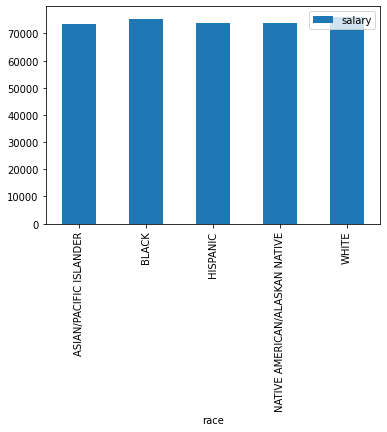

In [78]:
salary_by_race.plot(kind = "bar", y = "salary")